In [1]:
import numpy as np
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from node_perturbation.node_perturbation import NPLinear, NPConv2d
from node_perturbation.utils import np_train
from decorrelation.decorrelation import Decorrelation
import matplotlib.pyplot as plt
import argparse

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        torch.flatten # for input to linear layer
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [3]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, bias_lr=0.0, kappa=1e-2, epochs=50)
    
lossfun = torch.nn.CrossEntropyLoss().to(device)

sampler = torch.distributions.Distribution = torch.distributions.Normal(loc=0.0, scale=1e-3)

model = NPLinear(784, 10, sampler=sampler, device=device)
model, L1, D, T = np_train(args, model, lossfun, train_loader, device)

model = nn.Sequential(Decorrelation(784, decor_lr=args.decor_lr, bias_lr=args.bias_lr, kappa=args.kappa), NPLinear(784, 10, sampler=sampler, device=device))
model, L2, D, T = np_train(args, model, lossfun, train_loader, device)



epoch 0  	time:0.000 s	bp loss: 5.125478	decorrelation loss: 0.000000
epoch 1  	time:0.120 s	bp loss: 5.141914	decorrelation loss: 0.000000
epoch 2  	time:0.109 s	bp loss: 5.086017	decorrelation loss: 0.000000
epoch 3  	time:0.106 s	bp loss: 5.020443	decorrelation loss: 0.000000
epoch 4  	time:0.105 s	bp loss: 4.950663	decorrelation loss: 0.000000
epoch 5  	time:0.112 s	bp loss: 4.958891	decorrelation loss: 0.000000
epoch 6  	time:0.108 s	bp loss: 5.030915	decorrelation loss: 0.000000
epoch 7  	time:0.113 s	bp loss: 5.109805	decorrelation loss: 0.000000
epoch 8  	time:0.115 s	bp loss: 5.203100	decorrelation loss: 0.000000
epoch 9  	time:0.114 s	bp loss: 5.251314	decorrelation loss: 0.000000
epoch 10 	time:0.114 s	bp loss: 5.189917	decorrelation loss: 0.000000
epoch 11 	time:0.112 s	bp loss: 5.077959	decorrelation loss: 0.000000
epoch 12 	time:0.113 s	bp loss: 4.979762	decorrelation loss: 0.000000
epoch 13 	time:0.116 s	bp loss: 4.946799	decorrelation loss: 0.000000
epoch 14 	time:0.112

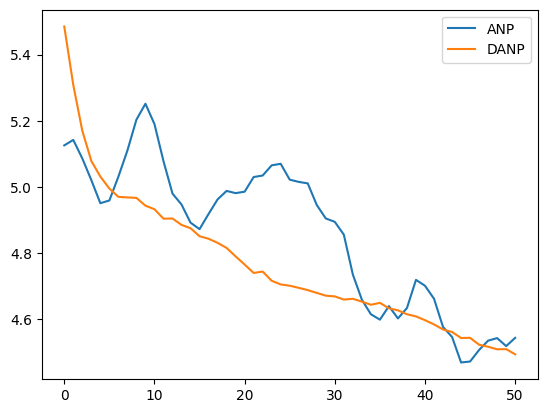

In [4]:
plt.plot(L1)
plt.plot(L2)
plt.legend(['ANP', 'DANP']);

Node perturbation for convolutional layers

In [5]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [10]:
args = argparse.Namespace(lr=1e-4, decor_lr=1e-1, bias_lr=0.0, kappa=1e-2, epochs=50, kernel_size=[3, 3])
    
lossfun = torch.nn.CrossEntropyLoss().to(device)

sampler = torch.distributions.Distribution = torch.distributions.Normal(loc=0.0, scale=1e-3)

model = nn.Sequential(NPConv2d(in_channels=1, out_channels=5, kernel_size=args.kernel_size, sampler=sampler, device=device),
                      nn.LeakyReLU(),
                      NPLinear(3380, 10, sampler=sampler, device=device))
model, L1, D, T = np_train(args, model, lossfun, train_loader, device)

model = nn.Sequential(Decorrelation(784, decor_lr=args.decor_lr, bias_lr=args.bias_lr, kappa=args.kappa),
                      NPConv2d(in_channels=1, out_channels=5, kernel_size=args.kernel_size, sampler=sampler, device=device),
                      nn.LeakyReLU(),
                      NPLinear(3380, 10, sampler=sampler, device=device))
model, L2, D, T = np_train(args, model, lossfun, train_loader, device)

epoch 0  	time:0.000 s	bp loss: 5.016179	decorrelation loss: 0.000000
epoch 1  	time:0.284 s	bp loss: 5.082790	decorrelation loss: 0.000000
epoch 2  	time:0.291 s	bp loss: 5.295777	decorrelation loss: 0.000000
epoch 3  	time:0.289 s	bp loss: 5.480413	decorrelation loss: 0.000000
epoch 4  	time:0.293 s	bp loss: 5.672516	decorrelation loss: 0.000000
epoch 5  	time:0.279 s	bp loss: 6.108057	decorrelation loss: 0.000000
epoch 6  	time:0.276 s	bp loss: 6.013986	decorrelation loss: 0.000000
epoch 7  	time:0.286 s	bp loss: 5.936482	decorrelation loss: 0.000000
epoch 8  	time:0.288 s	bp loss: 6.011081	decorrelation loss: 0.000000
epoch 9  	time:0.293 s	bp loss: 5.797246	decorrelation loss: 0.000000
epoch 10 	time:0.288 s	bp loss: 5.337462	decorrelation loss: 0.000000
epoch 11 	time:0.306 s	bp loss: 5.302613	decorrelation loss: 0.000000
epoch 12 	time:0.288 s	bp loss: 5.249901	decorrelation loss: 0.000000
epoch 13 	time:0.297 s	bp loss: 5.427909	decorrelation loss: 0.000000
epoch 14 	time:0.287

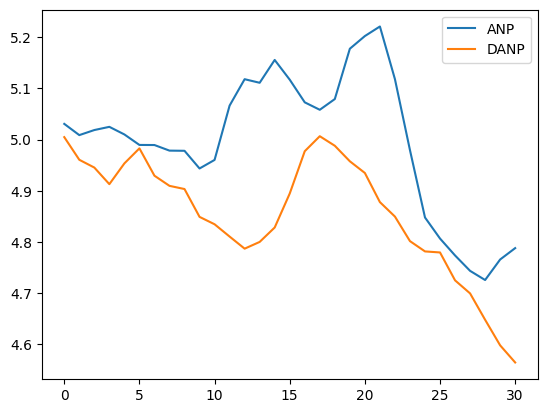

In [9]:
plt.plot(L1)
plt.plot(L2)
plt.legend(['ANP', 'DANP']);